In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [5]:
# 한글출력을 위함 (나눔체 설치)
# 실행 후 리빌드
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [6]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

# **피드백 모음집**

In [7]:
# 피드백1 [완료]
# 초반에는  info로
# 굳이 만들지 않아도 되는 변수는 삭제할 것. 

# 피드백2 [완료]
# 그래프를 병렬적으로 보기 쉽게 표현해주세요. 남자, 여자 몇 위 ... -> 알기 쉽게끔 정리해주시는 것이 좋아요.
# EDA는 큰 덩어리에서 시작해서 점점 세분화 하며 진행 하는 방향으로.

# 피드백3
# 영화 리뷰를 한 사람이 몇 명이니(의미가 없으니) 날리겠다.
# 위 처럼 출력하는 것이 아닌 시각화(바챠트)
# 테이블로 보여주면 전체가 보여지는 것이 아님. 상대방은 알 수가 없어요.

# 피드백4 [완료]
# 이런 시각화는 처음에 해주는 것이 좋아요. -> EDA도 스토리가 있어야 해요. 기승전결
# 데이터 EDA는 초반에, 이후에 인사이트 
# Depth있게 진행. 그래야 협업하는 사람도 이해할 수 있어요.

# 피드백5
# 영화 재개봉 가능성.
# 삭제를 하게 된다면 근거 적기.

# 피드백6 [완료]
# 이 그래프도 상단에 적고,
# 비슷한 류의 그래프가 있으니 둘 중에 하나만 선택해서 기록해주세요.

# 피드백7
# 이런 스택챠트 보다 바 챠트를 양쪽으로.
# 여자의 경우 뮤지컬 - 미스테리 비율 달라요... 따라서 성별별로 따로 그리는 것이 좋다.

# 피드백8
# 위의 그래프도 스택 챠트가 아니라, 따로 표현하는 것이 좋다.
# 각 그룹의 비율이 다를 수 있어요.

# 피드백9 [완료]
# EDA는 데이터에 입각 - 2000년도의 데이터 분포를 보여줘야한다.
# 지금 제가 낸 의견은 주관적입니다. -> 근거가 있어야 합니다.

# 피드백10
# 0.3의 경우에는 크게 의미가 없기 때문에 other 항목으로.
# 의미있는 비율들만 중점적으로 보는 것이 좋아요.


# 피드백 이외에도 내가 더 할 수 있는 것은 무엇인가요? 120% 발휘해보세요.


### 의문도 확인해 보세요 ###
# 의문1. ratings 데이터 프레임의 경우 30.5 MB를 차지한다. 데이터 사이즈를 줄일 필요가 있을까?
# 의문2. 각각의 데이터 프레임에는 결측치가 존재하지 않는다. 그러나, 데이터 병합시 결측값이 발생할 수 있을까?
# 의문3. timestamp를 시계열 데이터로 사용할 수 있을까? (ex. 유저의 성향 변화)
# 의문4. 동일한 유저가 동일한 영화를 두 번 이상 관람하고 각각 다른 평점을 부여할 수 있을까?
# 의문5. 영화를 관람했지만, 평점을 남기지 않았을 수도 있을까? ex. 귀차니즘 ..
# 의문6. users.age 이상치를 제거하는 것이 좋을까?

# **데이터 정의서**

**`MovieLens 1M Dataset`** <br/>
2000년에 MovieLens에 가입한 6,040 명의 MovieLens 사용자가 <br/>
약 3,900편의 영화에 대해 부여한 1,000,209개의 평점이 기록되어 있다.

<br/>

**`README.txt`** <br/>

    - Gender is denoted by a "M" for male and "F" for female
    
    - Age is chosen from the following ranges:
	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

    - Occupation is chosen from the following choices:
	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"



<br/>

## **1. users (유저 정보)**
    - user_id: 유저에게 부여된 고유 id
    - age: 유저의 나이
    - sex: 유저의 성별 (M: 남성, F: 여성)
    - occupation: 유저의 직업군
    - zip_code:

<br/>

## **2. movies (영화 정보)**
    - movie_id: 영화에 부여된 고유 id
    - movie_title: 영화의 제목 (개봉년도가 포함되어 있다)
    - genre: 영화 장르 (한 개 이상의 장르가 포함되어 있다)

<br/>

## **3. ratings (평점 정보)**
    - userId: 유저의 식별정보. 개별 유저의 id를 의미함.
    - movieId: 영화(아이템)의 식별정보. 개별 영화의 id를 의미함.
    - rating: 유저가 해당 영화를 보고 내린 평점
    - timestamp: 유저가 해당 영화를 보고 평점을 내린 시간 정보





# **users(유저 정보)**

In [8]:
u_cols =  ['user_id', 'sex', 'age', 'occupation', 'zip_code']
users_file = 'https://raw.githubusercontent.com/yunong-E/cp2-Recommendation-System/main/1M_Dataset/users.dat'
users = pd.read_csv(users_file, sep='::', names=u_cols, encoding='ISO-8859-1')

n_users = users.shape[0]
print('Number of users:', n_users)

Number of users: 6040


In [9]:
users.head(3)

,user_id,sex,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   sex         6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [11]:
# 결측치는 없습니다.
users.isna().sum()

user_id       0
sex           0
age           0
occupation    0
zip_code      0
dtype: int64

In [12]:
# 중복값도 존재하지 않습니다.
users.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd58c69b2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd58c6e4880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd58c686fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd58c69bb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd58c69be20>],
 'means': []}

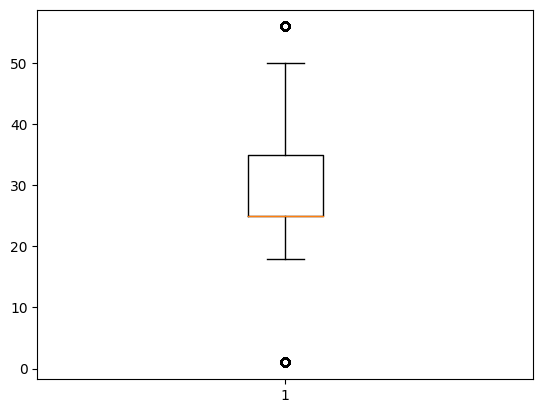

In [13]:
# 이상치 box plot을 그려주면 좋겠습니다.
plt.boxplot(users['age'])

# **movies(영화 정보)**

In [14]:
i_cols = ['movie_id', 'movie_title', 'genre']

movies_file = 'https://raw.githubusercontent.com/yunong-E/cp2-Recommendation-System/main/1M_Dataset/movies.dat'
movies = pd.read_csv(movies_file, sep='::', names=i_cols, encoding='ISO-8859-1') # parse_dates=["release_date"]

n_movies = movies.shape[0]
print("Number of movies:",n_movies)

Number of movies: 3883


In [15]:
movies.head(3)

,movie_id,movie_title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_id     3883 non-null   int64 
 1   movie_title  3883 non-null   object
 2   genre        3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [17]:
# 결측치 없습니다.
movies.isna().sum()

movie_id       0
movie_title    0
genre          0
dtype: int64

In [18]:
# 중복값도 존재하지 않습니다.
movies.duplicated().sum()

0

# **ratings(평점 정보)**

In [19]:
r_cols =  ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_file = 'https://raw.githubusercontent.com/yunong-E/cp2-Recommendation-System/main/1M_Dataset/ratings.dat'
ratings = pd.read_csv(ratings_file, sep='::', names=r_cols, encoding='ISO-8859-1')

ratings_num = ratings.shape[0]
unique_ratings_num = len(ratings.user_id.unique())

print('Number of Users:', ratings_num)
print('Number of Unique users:', unique_ratings_num)

Number of Users: 1000209
Number of Unique users: 6040


In [20]:
ratings.head(3)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [21]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [22]:
# 결측치 없습니다.
ratings.isna().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [23]:
# 중복값도 존재하지 않습니다.
ratings.duplicated().sum()

0

# **EDA**

In [24]:
"""
분석가인 내가 알고자 하는 것
1. 영화의 장르는 몇 가지가 있을까? [완료]
2-1. 영화의 개봉년도를 따로 구분하는 것은 어떨까? (새로운 컬럼 생성) [완료]
2-2. 영화 개봉 년도의 빈도를 확인해볼까? [완료]
3. 직업군은 숫자로 표현이 되어있다. 각각의 숫자가 의미하는 것은 무엇일까? -> README.txt 를 통해 알 수 있었다. [완료]
4. 성별별, 직업군별 영화 선호도가 있을까?
5. 모든 테이블을 join해서 보여주는 것이 편할까?
6. 내가 데이터 분석을 통해서 얻고자 하는 인사이트는 무엇인가?
7. 이것을 왜 하게 되었는가? why?
8. 어떤 스토리라인(기승전결)을 만들 수 있을까?
9. 시대 흐름별로 인기 장르가 다를까?
10. MF을 1, 0으로 변경? -> 아니요 [완료]


- 일부 MovieID는 실수로 중복되어 영화와 일치하지 않습니다.
항목 및/또는 테스트 항목
- 영화는 대부분 손으로 입력하므로 오류 및 불일치가 존재할 수 있습니다.
"""

'\n분석가인 내가 알고자 하는 것\n1. 영화의 장르는 몇 가지가 있을까? [완료]\n2-1. 영화의 개봉년도를 따로 구분하는 것은 어떨까? (새로운 컬럼 생성) [완료]\n2-2. 영화 개봉 년도의 빈도를 확인해볼까? [완료]\n3. 직업군은 숫자로 표현이 되어있다. 각각의 숫자가 의미하는 것은 무엇일까? -> README.txt 를 통해 알 수 있었다. [완료]\n4. 성별별, 직업군별 영화 선호도가 있을까?\n5. 모든 테이블을 join해서 보여주는 것이 편할까?\n6. 내가 데이터 분석을 통해서 얻고자 하는 인사이트는 무엇인가?\n7. 이것을 왜 하게 되었는가? why?\n8. 어떤 스토리라인(기승전결)을 만들 수 있을까?\n9. 시대 흐름별로 인기 장르가 다를까?\n10. MF을 1, 0으로 변경?\n\n\n- 일부 MovieID는 실수로 중복되어 영화와 일치하지 않습니다.\n항목 및/또는 테스트 항목\n- 영화는 대부분 손으로 입력하므로 오류 및 불일치가 존재할 수 있습니다.\n'

In [25]:
print('유저의 수:', n_users)
print("평가된 영화의 갯수:",n_movies)
print('평가의 갯수:', ratings_num)
print('평점을 부여한 사람의 수(유저 수와 동일):', unique_ratings_num)

유저의 수: 6040
평가된 영화의 갯수: 3883
평가의 갯수: 1000209
평점을 부여한 사람의 수(유저 수와 동일): 6040


In [26]:
# 직업군별로 선호하는 영화 장르가 다를까? 사람의 성향이 반영된 것이 직업이고.
# 전체 영화 장르에 따라서... 성별별, 직업군별 영화 장르 선호도가 따라가는 것 같기도 하다..

In [27]:
# README.txt를 참조하여 직업군 데이터프레임을 생성합니다.
occ_id = [id for id in range(0, 21)]
occ_list = {'occupation': ["other", "academic/educator", "artist","clerical/admin"
                          , "college/grad student", "customer service"
                          , "doctor/health care", "executive/managerial", "farmer"
                          , "homemaker", "K-12 student", "lawyer", "programmer"
                          , "retired", "sales/marketing", "scientist"
                          , "self-employed", "technician/engineer", "tradesman/craftsman"
                          , "unemployed", "writer"],
            'occupation_id': occ_id}

occupation = pd.DataFrame(occ_list, columns=['occupation_id', 'occupation']) 
occupation

,occupation_id,occupation
0,0,other
1,1,academic/educator
2,2,artist
3,3,clerical/admin
4,4,college/grad student
5,5,customer service
6,6,doctor/health care
7,7,executive/managerial
8,8,farmer
9,9,homemaker


In [28]:
# merge를 진행합니다.
# '영화 이름(movie_title)'과 '평점(rating)'을 동시에 확인하기 위함이며, 이를 통해 '영화별 평균 평점'과 같은 통계치를 낼 수 있습니다.
df = pd.merge(ratings, movies, on='movie_id')
df

,user_id,movie_id,rating,timestamp,movie_title,genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,White Boys (1999),Drama
1000207,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [29]:
# 영화별 평균 평점을 확인해봅시다.
chk_ratings = pd.DataFrame(df.groupby('movie_title').mean()['rating'])
chk_ratings

,rating
movie_title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568
...,...
"Zed & Two Noughts, A (1985)",3.413793
Zero Effect (1998),3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000


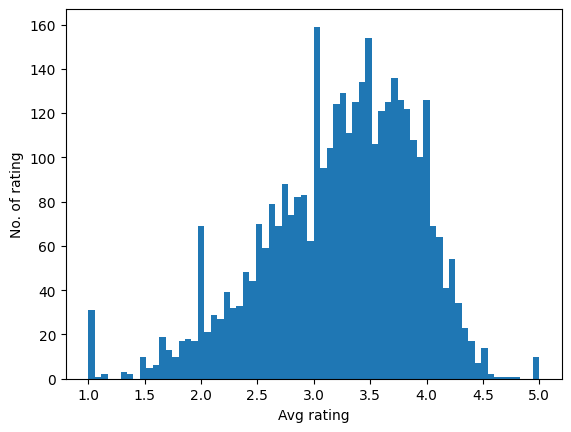

In [30]:
# 영화별 평균 평점(ratings)의 분포도
# 100k 데이터의 분포도와 비교했을 때, 보다 뚜렷한 정규분포의 형태를 띄고 있음을 확인할 수 있다.
plt.hist(chk_ratings['rating'], bins=70)
plt.xlabel('Avg rating')
plt.ylabel('No. of rating')
plt.show()

In [31]:
# 영화의 개봉년도 컬럼을 새로 생성하여, 영화 개봉일의 분포도를 확인하고자 합니다.

# movies['release'] = movies['movie_title']
# release = movies['movie_title'].str.split("(").get(1)

# 년도 추출과 동시에 object형에서 int형으로 변환합니다.
release = movies['movie_title'].map(lambda x: x[-5:-1]).astype(int)
movies['release'] = release
movies.head(3)

,movie_id,movie_title,genre,release
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995


In [32]:
# 기록되어 있는 최초, 최후의 영화 개봉일 1910, 2020
# movies.release.min(), movies.release.max()
movies.describe()

,movie_id,release
count,3883.000000,3883.000000
mean,1986.049446,1986.066959
std,1146.778349,16.895690
min,1.000000,1919.000000
25%,982.500000,1982.000000
50%,2010.000000,1994.000000
75%,2980.500000,1997.000000
max,3952.000000,2000.000000


In [33]:
movies.release.unique()

array([1995, 1994, 1996, 1976, 1993, 1992, 1988, 1967, 1964, 1977, 1965,
       1982, 1962, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970,
       1960, 1955, 1956, 1959, 1968, 1980, 1975, 1986, 1948, 1943, 1963,
       1950, 1946, 1987, 1997, 1974, 1958, 1949, 1972, 1998, 1933, 1952,
       1951, 1957, 1961, 1954, 1934, 1944, 1942, 1941, 1953, 1939, 1947,
       1945, 1938, 1935, 1936, 1926, 1932, 1930, 1971, 1979, 1966, 1978,
       1985, 1983, 1984, 1931, 1922, 1927, 1929, 1928, 1925, 1923, 1999,
       1919, 2000, 1920, 1921])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd586b0d280>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd586b0d7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd586b1efa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd586b0dd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd586b0dfa0>],
 'means': []}

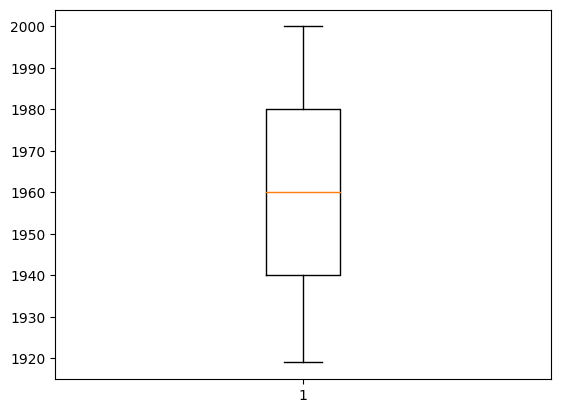

In [34]:
# 이상치 box plot을 그려주면 좋겠습니다.
plt.boxplot(movies['release'].unique())

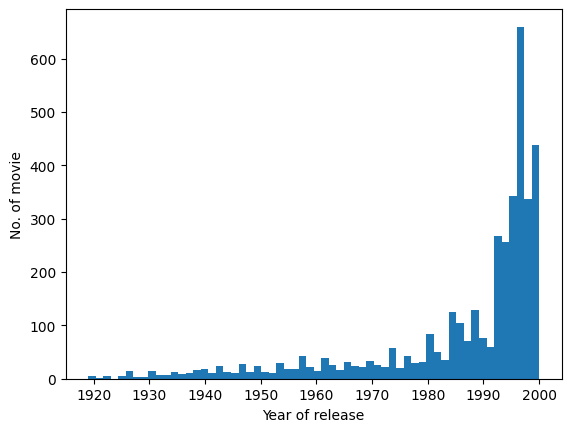

In [35]:
# 개봉년도를 10년 단위로 구분지어 한 눈에 알기 쉽게 시각화를 진행합니다.
# 세부 년도별 그래프를 작성시, 아래와 같이 한 눈에 파악하기 어렵기 때문입니다.
plt.hist(movies['release'], bins=60)
plt.xlabel('Year of release')
plt.ylabel('No. of movie')
plt.show()

In [36]:
release_decade = []
    
for row in movies['release']:
  if row <= 1919:
    release_decade.append('1910')
  elif row <= 1929:
    release_decade.append('1920')
  elif row <= 1939:
    release_decade.append('1930')
  elif row <= 1949:
    release_decade.append('1940')
  elif row <= 1959:
    release_decade.append('1950')
  elif row <= 1969:
    release_decade.append('1960')
  elif row <= 1979:
    release_decade.append('1970')
  elif row <= 1989:
    release_decade.append('1980')
  elif row <= 1999:
    release_decade.append('1990')
  else:
    release_decade.append('2000')

movies['release_decade'] = release_decade
movies['release_decade'] = movies['release_decade'].astype(int)

In [37]:
# 10년 단위(decade)로 개봉한 영화의 갯수들을 카운트 합니다.
release_cnt = movies.groupby('release_decade')['release'].count()
release_cnt

release_decade
1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: release, dtype: int64

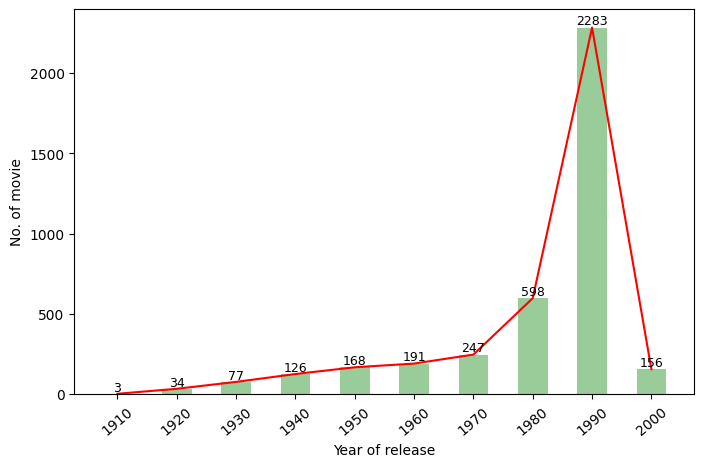

In [38]:
# 년도별 개봉한 영화의 갯수 입니다.
# 1990년도에 개봉한 영화가 가장 많았음을 알 수 있습니다.
# 2000년도 이후에는 급격한 감소량을 보입니다. 
# 이는 2000년도 이후에 영화 개봉률이 하락했기 때문이 아니라, 2003년 2월까지의 데이터를 사용했기 때문에 이런 추이를 보이는 것입니다.
# MovieLens 1M Dataset에 대한 설명 https://grouplens.org/datasets/movielens/ [Released 2/2003.]
plt.figure(figsize=(8, 5))
bar1 = plt.bar(release_cnt.index, release_cnt.values, width=5, color='green', alpha=0.4)
plt.xlabel('Year of release')
plt.ylabel('No. of movie')
plt.plot(release_cnt.index, release_cnt.values, color='red')
plt.xticks(release_cnt.index, rotation=40)

for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%1d' % height, ha='center', va='bottom', size = 9)

plt.show()

In [39]:
# 장르 중 첫번째로 언급된 (주요)장르를 main 장르로 선정하여 추출합니다.
# 개봉된 영화들의 장르 추이를 파악하기 위함입니다.
movies['main_genre'] = movies['genre'].apply(lambda x: x.split('|'))
chk_main_genre = []

for raw in range(len(movies['main_genre'])):
  chk_main_genre.append(movies.main_genre.get(raw)[0])

movies['main_genre'] = chk_main_genre

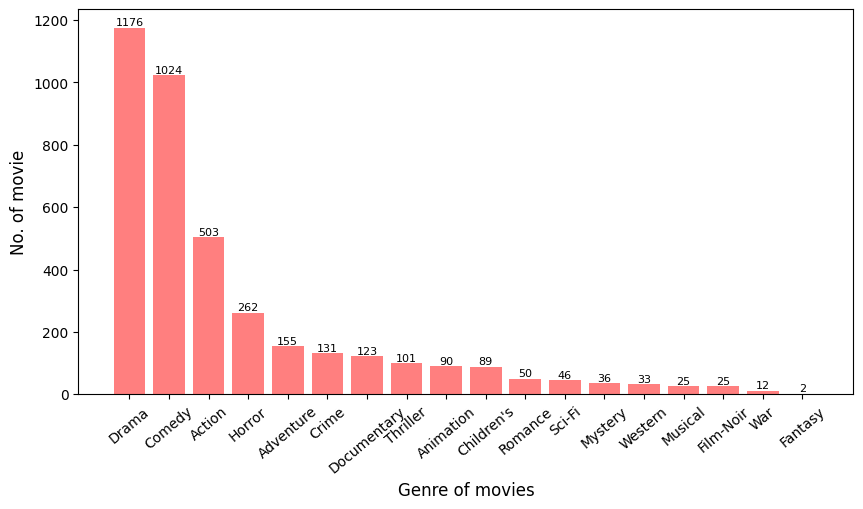

In [40]:
# 장르별 합을 구한뒤 내림차순으로 정렬합니다.
# 드라마 - 코메디 - 액션 순으로 개봉된 영화들의 장르들이 압도적으로 많음을 파악할 수 있었습니다.
genre_sum = movies.groupby('main_genre')['genre'].count().sort_values(ascending=False)
genre_sum

plt.figure(figsize=(10, 5))
bar = plt.bar(genre_sum.index, genre_sum.values, color='red', alpha=0.5)
plt.xticks(rotation=40)
# plt.grid(True)
plt.xlabel('Genre of movies', fontsize=12)
plt.ylabel('No. of movie', fontsize=12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%1d' % height, ha='center', va='bottom', size = 8)

plt.show()

In [41]:
# 그렇다면 개봉된 영화의 장르 vs 흥행한 영화의 장르가 같을까요?

In [44]:
# 연령별 인기 장르가 있을까요?
# 먼저 연령대별 비율을 확인해봅니다.

In [45]:
users

,user_id,sex,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


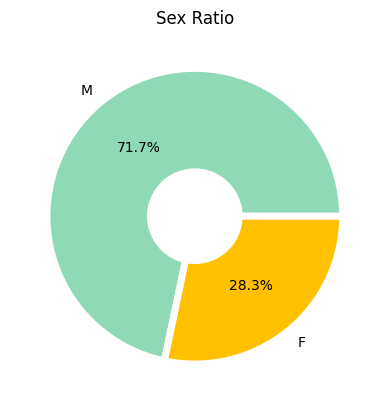

In [46]:
# 성별에 따른 인기 장르가 있을까요?
# 먼저 성비를 확인해봅니다.
sex_ratio = users.sex.value_counts(normalize=True)

colors = ['#8fd9b6', '#ffc000']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.title('Sex Ratio')
plt.pie(sex_ratio, labels=sex_ratio.index, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

In [47]:
# 성별에 따른 관람한 영화 장르를 확인하기 위해 데이터프레임을 병합합니다. 
########### EDA상단으로 올리는 것이 좋겠습니다. ##########
ratings_users = pd.merge(ratings, users, on='user_id') # 평점+유저
ratings_users_movies = pd.merge(ratings_users, movies, on='movie_id') # (평점+유저)+영화정보

In [48]:
ratings_users_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   user_id         1000209 non-null  int64 
 1   movie_id        1000209 non-null  int64 
 2   rating          1000209 non-null  int64 
 3   timestamp       1000209 non-null  int64 
 4   sex             1000209 non-null  object
 5   age             1000209 non-null  int64 
 6   occupation      1000209 non-null  int64 
 7   zip_code        1000209 non-null  object
 8   movie_title     1000209 non-null  object
 9   genre           1000209 non-null  object
 10  release         1000209 non-null  int64 
 11  release_decade  1000209 non-null  int64 
 12  main_genre      1000209 non-null  object
dtypes: int64(8), object(5)
memory usage: 106.8+ MB


In [49]:
# 결측값이 없음을 확인했습니다.
ratings_users_movies.isna().sum()

user_id           0
movie_id          0
rating            0
timestamp         0
sex               0
age               0
occupation        0
zip_code          0
movie_title       0
genre             0
release           0
release_decade    0
main_genre        0
dtype: int64

In [50]:
# 중복값이 없음을 확인했습니다.
ratings_users_movies.duplicated().sum()

0

In [51]:
ratings_users_movies.head()

,user_id,movie_id,rating,timestamp,sex,age,occupation,zip_code,movie_title,genre,release,release_decade,main_genre
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1970,Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1970,Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1970,Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1970,Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1970,Drama


In [52]:
ratings_users_movies.main_genre.unique()

array(['Drama', 'Animation', 'Musical', 'Action', 'Comedy', 'Adventure',
       'Romance', "Children's", 'Thriller', 'Crime', 'Western',
       'Documentary', 'Mystery', 'Horror', 'Sci-Fi', 'Film-Noir', 'War',
       'Fantasy'], dtype=object)

In [131]:
generes = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy',
           'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
           'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [116]:
temp = ratings_users_movies.groupby(['main_genre', 'sex'])['sex'].count()
# temp.sum() # 1000209
temp

main_genre   sex
Action       F       45650
             M      211807
Adventure    F       10322
             M       33308
Animation    F       10918
             M       26018
Children's   F        6650
             M       14841
Comedy       F       76899
             M      200024
Crime        F        8413
             M       29436
Documentary  F        1702
             M        5115
Drama        F       61441
             M      147186
Fantasy      F         127
             M         663
Film-Noir    F        2068
             M        7275
Horror       F        8608
             M       35562
Musical      F        2844
             M        4268
Mystery      F        2621
             M        7616
Romance      F        1189
             M        1643
Sci-Fi       F        1890
             M        9574
Thriller     F        4312
             M       13539
War          F         101
             M         890
Western      F         685
             M        5004
Name: sex, 

In [154]:
M_genre = []
F_genre =[]

for i in range(len(temp)):
  if i % 2 == 1:
    M_genre.append(temp[i])
    print(temp[i])
  else:
    F_genre.append(temp[i])

211807
33308
26018
14841
200024
29436
5115
147186
663
7275
35562
4268
7616
1643
9574
13539
890
5004


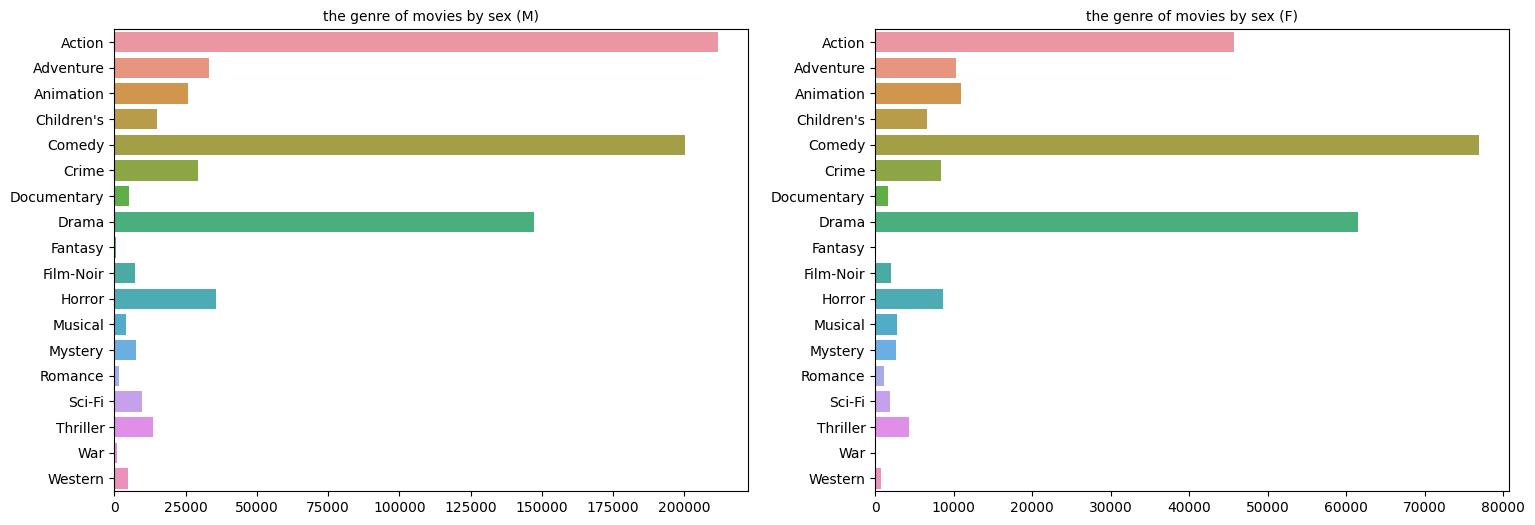

In [173]:
# 남성과 여성의 성비 차이로 단위 수가 다름을 알 수 있다.
# 남성의 경우 Action-Comedy-Drama 순으로 영화 관람을 한 반면,
# 여성의 경우 Comedy-Drama-Action 순으로 영화를 관람했음을 알 수 있다.
# 성별에 따라 관람한 영화의 장르가 다름을 확인할 수 있다.
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
sns.barplot(x=M_genre, y=generes)
plt.title('the genre of movies by sex (M)', fontsize=10)

plt.subplot(1,2,2)
sns.barplot(x=F_genre, y=generes)
plt.title('the genre of movies by sex (F)', fontsize=10)
plt.show()

In [54]:
movies

,movie_id,movie_title,genre,release,release_decade,main_genre
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,Animation
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990,Adventure
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1990,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,1990,Comedy
4,5,Father of the Bride Part II (1995),Comedy,1995,1990,Comedy
...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000,2000,Comedy
3879,3949,Requiem for a Dream (2000),Drama,2000,2000,Drama
3880,3950,Tigerland (2000),Drama,2000,2000,Drama
3881,3951,Two Family House (2000),Drama,2000,2000,Drama


In [ ]:
users

In [ ]:
ratings

In [ ]:
# 직업군에 따른 인기 장르가 있을까요?